# Data Cleaning Notebook



--------



### Author: Will Sanzone
### Email: wsanzoneds@gmail.com

## Introduction

The purpose of this notebook is as follows:

1. input a file into the `file` variable into the second cell below
2. Modify the filename in the last cell of the workbook to be the output name that you would like
3. Run the entire notebook to output a clean `.csv` file for encoding and pre-processing

This data was sourced from Inside Airbnb, a link to the data files used can be found here: http://insideairbnb.com/get-the-data. The files that I downloaded for this project are all titled `listings.csv.gz`. **You will have to download the file and unzip it for this notebook to work.**

-----

Note: you will have to scroll down to the "New York City, New York, United States" section and click the link titled "show archived data."

The data sourced from Inside Airbnb has 74 features, a data dictionary for these variables can be found here: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

## Importing Libraries & Reading In Files

We will be importing the standard data science libraries, along with BeautifulSoup, requests, re, urllib, and time.

In [1]:
# The holy triad of data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Other additional libraries
import seaborn as sns
pd.set_option('display.max_columns', None)
import requests
from bs4 import BeautifulSoup
import re
import urllib
import time

/Users/williamsanzone/opt/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now we can read in our file. **Note:** The filename will change based on what city and time region you want to scrape from. If you change the filename in the below cell, be sure to change it in the final cell of the notebook as well so the output file naming convention stays the same.

In [2]:
# READ IN ONE FILE AT A TIME AND RUN NOTEBOOK TO CLEAN EACH FILE
file = 'raw_data/nyc_sept2021.csv'
df = pd.read_csv(file)
df.shape

(36923, 74)

Our dataset has 37,410 rows and 74 columns. We can take a look at the first few rows of the DataFrame with the `head()` call.

In [3]:
df.head(2)

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20210901220703   2021-09-02   
1  3831  https://www.airbnb.com/rooms/3831  20210901220703   2021-09-02   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   

                                 host_url    host_name  host_since  \
0  https://www.airbnb.com/users/show/2845     Jennifer  2008-09-09   
1  https://www.airbnb.com/users/show/4869  LisaRoxanne  2008-12-07   

                       host_location  \
0  New York, New York, United States   
1  New York, New York, United States   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  a few days or more   
1  Laid-back Native New Yorker (formerly bi-coast...        within a day   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                34%                  19%                 f   
1                50%                  86%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/50fc5...   
1  https://a0.muscache.com/im/users/4869/profile_...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/50fc5...            Midtown   
1  https://a0.muscache.com/im/users/4869/profile_...       Clinton Hill   

   host_listings_count  host_total_listings_count  \
0                  6.0                        6.0   
1                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'offline_governm...                    t   
1  ['email', 'phone', 'reviews', 'offline_governm...                    t   

  host_identity_verified                      neighbourhood  \
0                      t            New York, United States   
1                      t  Brooklyn, New York, United States   

  neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude  \
0                Midtown                    Manhattan  40.75356  -73.98559   
1     Bedford-Stuyvesant                     Brooklyn  40.68494  -73.95765   

        property_type        room_type  accommodates  bathrooms  \
0  Entire rental unit  Entire home/apt             1        NaN   
1  Entire guest suite  Entire home/apt             3        NaN   

  bathrooms_text  bedrooms  beds  \
0         1 bath       NaN   1.0   
1         1 bath       1.0   3.0   

                                           amenities    price  minimum_nights  \
0  ["Free street parking", "Heating", "TV", "Dedi...  $150.00              30   
1  ["Dedicated workspace", "Iron", "Stove", "Hair...   $76.00               1   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    30.0                    30.0   
1             730                     1.0                     1.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    30.0   
1                  1125.0                  1125.0                     1.0   

   maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  \
0                  1125.0            

We can also look at random rows of the DataFrame with the `sample()` method.

In [4]:
df.sample(2)

id                            listing_url       scrape_id  \
15142  21970487  https://www.airbnb.com/rooms/21970487  20210901220703   
18934  29573034  https://www.airbnb.com/rooms/29573034  20210901220703   

      last_scraped                                            name  \
15142   2021-09-02   Newly Renovated Bed-Stuy Brownstone Apartment   
18934   2021-09-02  Studio Apartment Full Bath 15 Minutes From JFK   

                                             description  \
15142  Beautiful brownstone located on a gorgeous tre...   
18934  Nice studio with a full sized bed and a full b...   

                                   neighborhood_overview  \
15142  This is a quite  treeline block near restauran...   
18934                                                NaN   

                                             picture_url    host_id  \
15142  https://a0.muscache.com/pictures/df43694e-4962...  158298807   
18934  https://a0.muscache.com/pictures/7b6ff47c-ee63...  141027957   

                                          host_url host_name  host_since  \
15142  https://www.airbnb.com/users/show/158298807    Marcia  2017-11-11   
18934  https://www.airbnb.com/users/show/141027957  Radhames  2017-07-17   

                           host_location  \
15142    Queens, New York, United States   
18934  Brooklyn, New York, United States   

                                              host_about host_response_time  \
15142                                                NaN     within an hour   
18934  I am very accommodating and very easy to get a...     within an hour   

      host_response_rate host_acceptance_rate host_is_superhost  \
15142               100%                 100%                 f   
18934               100%                 100%                 t   

                                      host_thumbnail_url  \
15142  https://a0.muscache.com/im/pictures/user/42d2b...   
18934  https://a0.muscache.com/im/pictures/user/de5e7...   

                                        host_picture_url host_neighbourhood  \
15142  https://a0.muscache.com/im/pictures/user/42d2b...                NaN   
18934  https://a0.muscache.com/im/pictures/user/de5e7...      East New York   

       host_listings_count  host_total_listings_count  \
15142                  1.0                        1.0   
18934                  2.0                        2.0   

                                      host_verifications host_has_profile_pic  \
15142                      ['email', 'phone', 'reviews']                    t   
18934  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   

      host_identity_verified                       neighbourhood  \
15142                      f  Brooklyn , New York, United States   
18934                      t                                 NaN   

      neighbourhood_cleansed neighbourhood_group_cleansed  latitude  \
15142     Bedford-Stuyvesant                     Brooklyn  40.69301   
18934          Cypress Hills                     Brooklyn  40.68909   

       longitude       property_type        room_type  accommodates  \
15142  -73.95243  Entire rental unit  Entire home/apt             4   
18934  -73.87055  Entire rental unit  Entire home/apt             2   

       bathrooms bathrooms_text  bedrooms  beds  \
15142        NaN         1 bath       1.0   4.0   
18934        NaN         1 bath       NaN   1.0   

                                               amenities    price  \
15142  ["Dedicated workspace", "Iron", "Stove", "Hair...  $158.00   
18934  ["Dedicated workspace", "Iron", "Stove", "Hair...   $60.00   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
15142               2            1125                     2.0   
18934               2              90                     2.0   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
15142                     2.0                  1125.0                  1125.0   
18934        

To get information about our variables and their datatypes, we can use the `info()` command.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

**From the above cell we can observe the following:**

- Several columns have null values
- `last_scraped` and `calendar_last_scraped` could be in the datetime format
- Seems like some columns are of the `object` type that could be booleans or converted to binary numeric values
- `first_review` and `last_review` should also be in the datetime format
- `bathrooms_text` will need to be converted to a numeric type and have the text removed


## Data Cleaning

Let's look for duplicates:

In [6]:
df.duplicated().sum()

0

That is good, there are already no duplicates in the dataset. Someone from InsideAirbnb must have already done this.

-----

We can convert the date values to the `datetime` datatype by using the built in Pandas method:

In [7]:
# Converts the values to a datetime format
df['last_scraped'] = pd.to_datetime(df.last_scraped)
df['calendar_last_scraped'] = pd.to_datetime(df.calendar_last_scraped)
df['first_review'] = pd.to_datetime(df.first_review)
df['last_review'] = pd.to_datetime(df.last_review)

# Sanity check to make sure that our changes were implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            36923 non-null  int64         
 1   listing_url                                   36923 non-null  object        
 2   scrape_id                                     36923 non-null  int64         
 3   last_scraped                                  36923 non-null  datetime64[ns]
 4   name                                          36910 non-null  object        
 5   description                                   35710 non-null  object        
 6   neighborhood_overview                         22510 non-null  object        
 7   picture_url                                   36923 non-null  object        
 8   host_id                                       36923 non-null  int6

Now we have all of our relevant date fields in the correct format.

The following variables should be binary 1's and 0's (where "t" is a 1, and "f" is a 0):

- `host_is_superhost`
- `host_has_profile_pic`
- `host_identity_verified`
- `has_availability`
- `instant_bookable`

We can do this by using the `.map` method from the `pandas` library:

In [8]:
# Using .map to put true values as a 1 and false values as a 0
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})

Let's double check to make sure that this has been executed correctly.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            36923 non-null  int64         
 1   listing_url                                   36923 non-null  object        
 2   scrape_id                                     36923 non-null  int64         
 3   last_scraped                                  36923 non-null  datetime64[ns]
 4   name                                          36910 non-null  object        
 5   description                                   35710 non-null  object        
 6   neighborhood_overview                         22510 non-null  object        
 7   picture_url                                   36923 non-null  object        
 8   host_id                                       36923 non-null  int6

We have a number of columns that will not be useful in our analysis. Before doing the rest of the cleaning, we will remove them.

In [10]:
# Identifying columns to remove
remove_list = ['scrape_id', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'neighbourhood', 'bathrooms',
              'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'minimum_maximum_nights', 
              'maximum_maximum_nights', 'calendar_updated', 'license', 'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

# Actually removing the columns
df = df.drop(columns = remove_list)

# Checking to make sure this has worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              36923 non-null  int64         
 1   listing_url                     36923 non-null  object        
 2   last_scraped                    36923 non-null  datetime64[ns]
 3   name                            36910 non-null  object        
 4   description                     35710 non-null  object        
 5   neighborhood_overview           22510 non-null  object        
 6   picture_url                     36923 non-null  object        
 7   host_id                         36923 non-null  int64         
 8   host_url                        36923 non-null  object        
 9   host_name                       36812 non-null  object        
 10  host_since                      36812 non-null  object        
 11  ho

Now let's see what we can do about the null values. The steps we will follow are:

- Look at all columns with missing values using `isna().sum()`
- go through each column and determine what to do with the null values. The options are as follows:
    - impute nulls
    - set nulls to zero or some other value
    - drop rows that contain null values
- put all of the clean columns into a new dataframe for use

In [11]:
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                 13
description                        1213
neighborhood_overview             14413
picture_url                           0
host_id                               0
host_url                              0
host_name                           111
host_since                          111
host_location                       209
host_about                        15287
host_response_time                15743
host_response_rate                15743
host_acceptance_rate              15102
host_is_superhost                   111
host_neighbourhood                 7197
host_total_listings_count           111
host_verifications                    0
host_has_profile_pic                111
host_identity_verified              111
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's make a Dataframe of all the rows that contain at least one `NaN` value

In [12]:
# Finding all rows with at least one NaN value
nan_values = df[df.isna().any(axis=1)] 

In [13]:
nan_values

id                            listing_url last_scraped  \
0          2595      https://www.airbnb.com/rooms/2595   2021-09-02   
2          5121      https://www.airbnb.com/rooms/5121   2021-09-02   
3          5136      https://www.airbnb.com/rooms/5136   2021-09-02   
5          5203      https://www.airbnb.com/rooms/5203   2021-09-02   
7          6848      https://www.airbnb.com/rooms/6848   2021-09-02   
...         ...                                    ...          ...   
36918  52002317  https://www.airbnb.com/rooms/52002317   2021-09-02   
36919  52004427  https://www.airbnb.com/rooms/52004427   2021-09-02   
36920  52005507  https://www.airbnb.com/rooms/52005507   2021-09-03   
36921  52005691  https://www.airbnb.com/rooms/52005691   2021-09-02   
36922  52006978  https://www.airbnb.com/rooms/52006978   2021-09-02   

                                                  name  \
0                                Skylit Midtown Castle   
2                                      BlissArtsSpace!   
3             Spacious Brooklyn Duplex, Patio + Garden   
5                   Cozy Clean Guest Room - Family Apt   
7                     Only 2 stops to Manhattan studio   
...                                                ...   
36918                      HUGE ROOM IN IDEAL LES SPOT   
36919  Furnished Cozy Bedroom in East Village Location   
36920               Bedroom Near Train w/ Washer Dryer   
36921  Furnished Cozy Bedroom in East Village Location   
36922                   Luxury Private ROOM in Midtown   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      We welcome you to stay in our lovely 2 br dupl...   
5      Our best guests are seeking a safe, clean, spa...   
7      Comfortable studio apartment with super comfor...   
...                                                  ...   
36918  Extremely Huge Room in the IDEAL Lower East Si...   
36919  Full room in a 4 bedroom, 2 bathroom shared ho...   
36920                 Bedroom Near Train w/ Washer Dryer   
36921  Full room in a 3 bedroom, 1 bathroom shared ho...   
36922  Cassa Studios and Residences powered by Outpos...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
2                                                    NaN   
3                                                    NaN   
5      Our neighborhood is full of restaurants and ca...   
7                                                    NaN   
...                                                  ...   
36918                                                NaN   
36919                                                NaN   
36920                                                NaN   
36921                                                NaN   
36922  Walk out of the Cassa  and you‚Äôll immediately ...   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/f0813a11-40b2...       2845   
2      https://a0.muscache.com/pictures/2090980c-b68e...       7356   
3      https://a0.muscache.com/pictures/miso/Hosting-...       7378   
5      https://a0.muscache.com/pictures/103776/b37157...       7490   
7      https://a0.muscache.com/pictures/e4f031a7-f146...      15991   
...                                                  ...        ...   
36918  https://a0.muscache.com/pictures/40bc2a16-7609...  283057520   
36919  https://a0.muscache.com/pictures/361bd18b-3f23...  305240193   
36920  https://a0.muscache.com/pictures/miso/Hosting-...    9372363   
36921  https://a0.muscache.com/pictures/958369fa-05c1...  305240193   
36922  https://a0.muscache.com/pictures/97df2011-610f...  367484028   

                                          host_url      host_name  host_since  \
0           https://www.airbnb.com/users/show/2845       Jennifer  2008-09-09   
2   

Let's take a look at rows where the `name` field is missing:

In [14]:
# Finding listings with a missing name field
name_missing = df[df['name'].isna()]

# Displaying these rows
name_missing

id                            listing_url last_scraped name  \
2129    2232600   https://www.airbnb.com/rooms/2232600   2021-09-02  NaN   
3351    4209595   https://www.airbnb.com/rooms/4209595   2021-09-02  NaN   
3460    4370230   https://www.airbnb.com/rooms/4370230   2021-09-02  NaN   
3636    4581788   https://www.airbnb.com/rooms/4581788   2021-09-06  NaN   
3821    4756856   https://www.airbnb.com/rooms/4756856   2021-09-02  NaN   
3842    4774658   https://www.airbnb.com/rooms/4774658   2021-09-02  NaN   
5150    6782407   https://www.airbnb.com/rooms/6782407   2021-09-02  NaN   
7017    9325951   https://www.airbnb.com/rooms/9325951   2021-09-02  NaN   
7522    9787590   https://www.airbnb.com/rooms/9787590   2021-09-02  NaN   
7888   10052289  https://www.airbnb.com/rooms/10052289   2021-09-02  NaN   
9345   12797684  https://www.airbnb.com/rooms/12797684   2021-09-02  NaN   
9488   12988898  https://www.airbnb.com/rooms/12988898   2021-09-02  NaN   
14372  21044649  https://www.airbnb.com/rooms/21044649   2021-09-02  NaN   

                                             description  \
2129                                                 NaN   
3351                                                 NaN   
3460   Beautiful 1BR apartment in the heart of Nolita...   
3636                                                 NaN   
3821   Sunny bedroom in Castlebraid, Bushwick! I shar...   
3842   Room available (sublet) Jan.<br />Price very n...   
5150   A cute and cozy private room in East Williamsb...   
7017   Ideally located in Midtown Manhattan, this lar...   
7522   Cozy and charming apartment available in the h...   
7888   Room in an apartment in Brooklyn with a bed fu...   
9345   Sunny Bedroom, 2 minutes from central park and...   
9488   El apartamento. Es confortable. La sala Cosina...   
14372                                                N/a   

                                   neighborhood_overview  \
2129                                                 NaN   
3351                                                 NaN   
3460                                                 NaN   
3636                                                 NaN   
3821                                                 NaN   
3842                                                 NaN   
5150   There is a laundromat and a deli around the co...   
7017                                                 NaN   
7522                                                 NaN   
7888      I like the neighhood, they are nice and gentle   
9345                                                 NaN   
9488                                                 NaN   
14372                                                NaN   

                                             picture_url    host_id  \
2129   https://a0.muscache.com/pictures/39659081/a0d2...   11395220   
3351   https://a0.muscache.com/pictures/54205293/aa72...   20700823   
3460   https://a0.muscache.com/pictures/54891824/e1c7...   22686810   
3636   https://a0.muscache.com/pictures/58399006/d216...   21600904   
3821   https://a0.muscache.com/pictures/59707548/6a5f...    1832442   
3842   https://a0.muscache.com/pictures/59912954/b0b3...   24625694   
5150   https://a0.muscache.com/pictures/85661400/33dc...   31147528   
7017   https://a0.muscache.com/pictures/386ba137-a71d...   33377685   
7522   https://a0.muscache.com/pictures/6b4f8157-edf4...   50448556   
7888   https://a0.muscache.com/pictures/08db8c15-1156...   49522403   
9345   https://a0.muscache.com/pictures/626e1b1b-09b1...   69715276   
9488   https://a0.muscache.com/pictures/3fcaf5b5-7b01...   71552588   
14372  https://a0.muscache.com/pictures/16759fd1-b5d2...  151547086   

                                          host_url host_name  host_since  \
2129    https://www.airbnb.com/users/show/11395220      Anna  2014-01-17   
3351    https://www.airbnb.com/users/show/20700823     Jesse  2014-08-29   
3460    https://www.airbnb.com/users/show/2

It looks like most of these rows that have the `name` field missing also have the `description` field missing. 

------

We can drop these rows as they will have little impact on our data.


In [15]:
# Querying the original dataframe to only include rows that have values for the name column
df = df[df["name"].str.contains("NaN") == False]

# re-checking our missing values list
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                        1210
neighborhood_overview             14402
picture_url                           0
host_id                               0
host_url                              0
host_name                           111
host_since                          111
host_location                       209
host_about                        15278
host_response_time                15730
host_response_rate                15730
host_acceptance_rate              15090
host_is_superhost                   111
host_neighbourhood                 7193
host_total_listings_count           111
host_verifications                    0
host_has_profile_pic                111
host_identity_verified              111
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's look at the `description` column. This is the text that each host provides for their listing:

In [16]:
# Finding rows with missing descriptions
description_missing = df[df['description'].isna()]

# displaying the data
description_missing

id                            listing_url last_scraped  \
1631    1550558   https://www.airbnb.com/rooms/1550558   2021-09-02   
2131    2237708   https://www.airbnb.com/rooms/2237708   2021-09-02   
2297    2478933   https://www.airbnb.com/rooms/2478933   2021-09-02   
2359    2592533   https://www.airbnb.com/rooms/2592533   2021-09-02   
2765    3368427   https://www.airbnb.com/rooms/3368427   2021-09-02   
...         ...                                    ...          ...   
36815  51944693  https://www.airbnb.com/rooms/51944693   2021-09-02   
36831  51953871  https://www.airbnb.com/rooms/51953871   2021-09-02   
36872  51965961  https://www.airbnb.com/rooms/51965961   2021-09-03   
36876  51968666  https://www.airbnb.com/rooms/51968666   2021-09-02   
36899  51985215  https://www.airbnb.com/rooms/51985215   2021-09-02   

                                                    name description  \
1631                                   Williamsburg Gem!         NaN   
2131                    Spacious 1bdrm furnished wifi tv         NaN   
2297       Ambient stylish bedroom with private bathroom         NaN   
2359     Private room in the heart of Williamsburg- L, G         NaN   
2765                                    Happy big family         NaN   
...                                                  ...         ...   
36815  New apt in QNS. Special$. 15 min from time square         NaN   
36831                            Elegant Private Bedroom         NaN   
36872  Close to airport highway and public transporta...         NaN   
36876                    Luxury Living 2BD HUDSON YAARDS         NaN   
36899  Charming room in Astoria,10 min from Times Square         NaN   

      neighborhood_overview  \
1631                    NaN   
2131                    NaN   
2297                    NaN   
2359                    NaN   
2765                    NaN   
...                     ...   
36815                   NaN   
36831                   NaN   
36872                   NaN   
36876                   NaN   
36899                   NaN   

                                             picture_url    host_id  \
1631   https://a0.muscache.com/pictures/bf04a0c4-51fc...    6044644   
2131   https://a0.muscache.com/pictures/9904fbdf-be3a...   10778096   
2297   https://a0.muscache.com/pictures/52b22860-8aa7...    1761578   
2359   https://a0.muscache.com/pictures/075b7d5e-ca1a...   13270449   
2765   https://a0.muscache.com/pictures/2215e307-2d92...    4044499   
...                                                  ...        ...   
36815  https://a0.muscache.com/pictures/e60c51ef-16d9...   91646104   
36831  https://a0.muscache.com/pictures/bc468a76-12d3...  267028253   
36872  https://a0.muscache.com/pictures/0e30b39d-be0e...   73611712   
36876  https://a0.muscache.com/pictures/4acaaee1-42d7...  307197943   
36899  https://a0.muscache.com/pictures/5f6e98b3-1503...   45399650   

                                          host_url  host_name  host_since  \
1631     https://www.airbnb.com/users/show/6044644      Damon  2013-04-22   
2131    https://www.airbnb.com/users/show/10778096       Ajay  2013-12-23   
2297     https://www.airbnb.com/users/show/1761578      Grant  2012-02-16   
2359    https://www.airbnb.com/users/show/13270449       Idan  2014-03-18   
2765     https://www.airbnb.com/users/show/4044499  Alexander  2012-11-02   
...                                            ...        ...         ...   
36815   https://www.airbnb.com/users/show/91646104        Pao  2016-08-24   
36831  https://www.airbnb.com/users/show/267028253      Julia  2019-06-07   
36872   https://www.airbnb.com/users/show/73611712       Cody  2016-05-23   
36876  https://www.airbnb.com/users/show/307197943   New York  2019-11-05   
36899   https://www.airbnb.com/users/show/45399650   Marijana  2015-09-29   

                             host_location  \
1631     New York, New York, United States   
2131     New York, New York, United States   
2297  

We want all listings in our dataset to have both a name and a description, so we will also drop these rows from the dataset.

In [17]:
# doing the same as above but now for the description column
df = df[df["description"].str.contains("NaN") == False]

# re-checking to make sure our changes have worked
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13245
picture_url                           0
host_id                               0
host_url                              0
host_name                           110
host_since                          110
host_location                       201
host_about                        14589
host_response_time                15236
host_response_rate                15236
host_acceptance_rate              14574
host_is_superhost                   110
host_neighbourhood                 6759
host_total_listings_count           110
host_verifications                    0
host_has_profile_pic                110
host_identity_verified              110
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's look at each column's missing values as a percentage of the total dataset:

In [18]:
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             37.100840
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.308123
host_since                         0.308123
host_location                      0.563025
host_about                        40.865546
host_response_time                42.677871
host_response_rate                42.677871
host_acceptance_rate              40.823529
host_is_superhost                  0.308123
host_neighbourhood                18.932773
host_total_listings_count          0.308123
host_verifications                 0.000000
host_has_profile_pic               0.308123
host_identity_verified             0.308123
neighbourhood_cleansed          

Let's keep working through this list with the small percentages. We will figure out what to do with these and then tackle the large percentages of missing values

------

Instead of re-writing the same code each time, we can create a function that will do it with a single call.

In [19]:
'''
MISSING VALUE LOOK FUNCTION:

INPUTS: df, column

Takes the dataframe and the column that you want to see where the missing values are

RETURNS: returns the dataframe aggregated by the missing values for the column specified
'''

def missing_value_look(df, column):
    missing = df[df[column].isna()]
    return missing

In [20]:
missing_value_look(df, 'host_name')

id                            listing_url last_scraped  \
632      455801    https://www.airbnb.com/rooms/455801   2021-09-02   
1187     895386    https://www.airbnb.com/rooms/895386   2021-09-02   
2495    2835711   https://www.airbnb.com/rooms/2835711   2021-09-02   
3520    4446862   https://www.airbnb.com/rooms/4446862   2021-09-02   
3830    4763327   https://www.airbnb.com/rooms/4763327   2021-09-02   
...         ...                                    ...          ...   
36023  51548283  https://www.airbnb.com/rooms/51548283   2021-09-02   
36024  51548289  https://www.airbnb.com/rooms/51548289   2021-09-02   
36025  51548296  https://www.airbnb.com/rooms/51548296   2021-09-02   
36026  51548310  https://www.airbnb.com/rooms/51548310   2021-09-02   
36027  51548319  https://www.airbnb.com/rooms/51548319   2021-09-02   

                                                    name  \
632        NYC APT- COMFY, WELCOMING STAY! Private rooms   
1187   NYC-Cozy Apt! Walk to Columbia Uni & Central P...   
2495    Sunny West Village Apartment on MacDougal Street   
3520                  Charming Room in Prospect Heights!   
3830                 Luxurious, best location, spa inc'l   
...                                                  ...   
36023  Student Only Property: Cozy Lofted Triple Room...   
36024  Student Only Property: Touching Large Double R...   
36025  Student Only Property: Immaculate Lofted Tripl...   
36026  Student Only Property: Attractive Large Single...   
36027  Student Only Property: Stylish Large Deluxe Do...   

                                             description  \
632    Upper Manhattan 3 bedroom apartment. Minutes w...   
1187   You‚Äôll love our NYC apt bcuz it‚Äôs comfy, large...   
2495   NOW WITH HIGH-SPEED WI-FI<br /><br />This ador...   
3520   Quiet room in three bedroom apt in Prospect He...   
3830   Brand new luxurious boutique building, swimmin...   
...                                                  ...   
36023  A short ride everywhere else. Whether you‚Äôre h...   
36024  A short ride everywhere else. Whether you‚Äôre h...   
36025  A short ride everywhere else. Whether you‚Äôre h...   
36026  A short ride everywhere else. Whether you‚Äôre h...   
36027  A short ride everywhere else. Whether you‚Äôre h...   

                                   neighborhood_overview  \
632    The neighborhood is great and safe. yes you wi...   
1187   The neighborhood is great and safe. It's ethni...   
2495                                       West Village!   
3520   This charming Brooklyn neighborhood offers man...   
3830   Quoting from Time Out Magazine: "Williamsburg ...   
...                                                  ...   
36023                                                NaN   
36024                                                NaN   
36025                                                NaN   
36026                                                NaN   
36027                                                NaN   

                                             picture_url    host_id  \
632    https://a0.muscache.com/pictures/97f13602-83bc...    2265770   
1187   https://a0.muscache.com/pictures/c13bfd56-52f6...    2265770   
2495   https://a0.muscache.com/pictures/71169c1c-0055...    3237504   
3520   https://a0.muscache.com/pictures/57579076/ace3...   23077718   
3830   https://a0.muscache.com/pictures/59917673/e733...   24576978   
...                                                  ...        ...   
36023  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36024  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36025  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36026  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36027  https://a0.muscache.com/pictures/prohost-api/H...  226804666   

                                          host_url host_name host_since  \
632      https://www.airbnb.com/users/show/2265770     

Since there are only a few rows without a host name, we will impute the `NaN` values with "unknown"

In [21]:
# Filling listings with missing host names with unknown
df['host_name'] = df['host_name'].fillna('unknown')

# Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13245
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                          110
host_location                       201
host_about                        14589
host_response_time                15236
host_response_rate                15236
host_acceptance_rate              14574
host_is_superhost                   110
host_neighbourhood                 6759
host_total_listings_count           110
host_verifications                    0
host_has_profile_pic                110
host_identity_verified              110
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Continuing along, let's look at the `host_since` column:

In [22]:
missing_value_look(df, 'host_since')

id                            listing_url last_scraped  \
632      455801    https://www.airbnb.com/rooms/455801   2021-09-02   
1187     895386    https://www.airbnb.com/rooms/895386   2021-09-02   
2495    2835711   https://www.airbnb.com/rooms/2835711   2021-09-02   
3520    4446862   https://www.airbnb.com/rooms/4446862   2021-09-02   
3830    4763327   https://www.airbnb.com/rooms/4763327   2021-09-02   
...         ...                                    ...          ...   
36023  51548283  https://www.airbnb.com/rooms/51548283   2021-09-02   
36024  51548289  https://www.airbnb.com/rooms/51548289   2021-09-02   
36025  51548296  https://www.airbnb.com/rooms/51548296   2021-09-02   
36026  51548310  https://www.airbnb.com/rooms/51548310   2021-09-02   
36027  51548319  https://www.airbnb.com/rooms/51548319   2021-09-02   

                                                    name  \
632        NYC APT- COMFY, WELCOMING STAY! Private rooms   
1187   NYC-Cozy Apt! Walk to Columbia Uni & Central P...   
2495    Sunny West Village Apartment on MacDougal Street   
3520                  Charming Room in Prospect Heights!   
3830                 Luxurious, best location, spa inc'l   
...                                                  ...   
36023  Student Only Property: Cozy Lofted Triple Room...   
36024  Student Only Property: Touching Large Double R...   
36025  Student Only Property: Immaculate Lofted Tripl...   
36026  Student Only Property: Attractive Large Single...   
36027  Student Only Property: Stylish Large Deluxe Do...   

                                             description  \
632    Upper Manhattan 3 bedroom apartment. Minutes w...   
1187   You‚Äôll love our NYC apt bcuz it‚Äôs comfy, large...   
2495   NOW WITH HIGH-SPEED WI-FI<br /><br />This ador...   
3520   Quiet room in three bedroom apt in Prospect He...   
3830   Brand new luxurious boutique building, swimmin...   
...                                                  ...   
36023  A short ride everywhere else. Whether you‚Äôre h...   
36024  A short ride everywhere else. Whether you‚Äôre h...   
36025  A short ride everywhere else. Whether you‚Äôre h...   
36026  A short ride everywhere else. Whether you‚Äôre h...   
36027  A short ride everywhere else. Whether you‚Äôre h...   

                                   neighborhood_overview  \
632    The neighborhood is great and safe. yes you wi...   
1187   The neighborhood is great and safe. It's ethni...   
2495                                       West Village!   
3520   This charming Brooklyn neighborhood offers man...   
3830   Quoting from Time Out Magazine: "Williamsburg ...   
...                                                  ...   
36023                                                NaN   
36024                                                NaN   
36025                                                NaN   
36026                                                NaN   
36027                                                NaN   

                                             picture_url    host_id  \
632    https://a0.muscache.com/pictures/97f13602-83bc...    2265770   
1187   https://a0.muscache.com/pictures/c13bfd56-52f6...    2265770   
2495   https://a0.muscache.com/pictures/71169c1c-0055...    3237504   
3520   https://a0.muscache.com/pictures/57579076/ace3...   23077718   
3830   https://a0.muscache.com/pictures/59917673/e733...   24576978   
...                                                  ...        ...   
36023  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36024  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36025  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36026  https://a0.muscache.com/pictures/prohost-api/H...  226804666   
36027  https://a0.muscache.com/pictures/prohost-api/H...  226804666   

                                          host_url host_name host_since  \
632      https://www.airbnb.com/users/show/2265770   un

Some of these links do not work, so we will drop these rows from the DataFrame.

In [23]:
# Indexing the dataframe to only contain rows with no NaN values for this column
df = df[df["host_since"].str.contains("NaN") == False]

# Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                        91
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's look at `host_location`

In [24]:
missing_value_look(df, 'host_location')

id                            listing_url last_scraped  \
5629    7387919   https://www.airbnb.com/rooms/7387919   2021-09-02   
5774    7584885   https://www.airbnb.com/rooms/7584885   2021-09-02   
5810    7632731   https://www.airbnb.com/rooms/7632731   2021-09-02   
6599    8758534   https://www.airbnb.com/rooms/8758534   2021-09-02   
6835    9093261   https://www.airbnb.com/rooms/9093261   2021-09-02   
...         ...                                    ...          ...   
35327  51138077  https://www.airbnb.com/rooms/51138077   2021-09-02   
35450  51214015  https://www.airbnb.com/rooms/51214015   2021-09-02   
36299  51686077  https://www.airbnb.com/rooms/51686077   2021-09-02   
36318  51692043  https://www.airbnb.com/rooms/51692043   2021-09-03   
36329  51703788  https://www.airbnb.com/rooms/51703788   2021-09-03   

                                                   name  \
5629                2 bed apartment 2 blocks from 42 st   
5774                            Charming large room ...   
5810          3 Bdr Upper West Side Elegance, 2500sq ft   
6599   Large 3 bdrm apt in Manhattan (downtown) village   
6835                       Large East Village 1 bedroom   
...                                                 ...   
35327           Luxe Brooklyn Studio with Amazing Views   
35450                                              Bank   
36299  Lovely studio apartment&Midtown best kept secret   
36318                        Rockaway Beach cozy studio   
36329  Rockaway Beach one bedroom unit with front deck!   

                                             description  \
5629   Beautiful location with terrace overlooking pr...   
5774   A charming and large room in a clean apartment...   
5810   Summer in NYC!<br />Family home - one block fr...   
6599   Beautiful spacious family friendly 3 bedroom a...   
6835   Perfectly located in the East Village near Uni...   
...                                                  ...   
35327  We're excited to host guest in our studio spac...   
35450  Free parking, restaurant lounge,, gas stationa...   
36299  Enjoy a stylish experience at this centrally-l...   
36318  Retreat to this cozy beach studio and experien...   
36329  Come enjoy your stay at this centrally located...   

      neighborhood_overview  \
5629                    NaN   
5774                    NaN   
5810                    NaN   
6599                    NaN   
6835                    NaN   
...                     ...   
35327                   NaN   
35450                   NaN   
36299                   NaN   
36318                   NaN   
36329                   NaN   

                                             picture_url    host_id  \
5629   https://a0.muscache.com/pictures/93735606/9fff...   37993952   
5774   https://a0.muscache.com/pictures/96256129/c794...   23129690   
5810   https://a0.muscache.com/pictures/96900488/5a63...   39455276   
6599   https://a0.muscache.com/pictures/110959755/665...   45619483   
6835   https://a0.muscache.com/pictures/e1b2729e-4b26...   47036828   
...                                                  ...        ...   
35327  https://a0.muscache.com/pictures/miso/Hosting-...   73660875   
35450  https://a0.muscache.com/pictures/f0cf452b-594c...  106921037   
36299  https://a0.muscache.com/pictures/miso/Hosting-...   51637918   
36318  https://a0.muscache.com/pictures/62b22195-5631...   88326292   
36329  https://a0.muscache.com/pictures/71b2c9e8-4abd...   88326292   

                                          host_url host_name  host_since  \
5629    https://www.airbnb.com/users/show/37993952    Andrew  2015-07-09   
5774    https://www.airbnb.com/users/show/23129690      Jing  2014-10-29   
5810    https://www.airbnb.com/users/show/39455276      Doug  2015-07-24   
6599    https://www.airbnb.com/users/show/45619483    Lesley  2015-10-02   
6835    https://www.airbnb.com/users/show/47036828     David  2015-10-20   
...                                            .

We will replace these missing values with the values from `host_neighbourhood` since they should be close enough.

In [25]:
# Filling the NaNs
df.host_location.fillna(df.host_neighbourhood, inplace=True)

#Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                        17
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


In [26]:
missing_value_look(df, 'host_location')

id                            listing_url last_scraped  \
6945    9231257   https://www.airbnb.com/rooms/9231257   2021-09-02   
10886  15067291  https://www.airbnb.com/rooms/15067291   2021-09-02   
11028  15409309  https://www.airbnb.com/rooms/15409309   2021-09-03   
11039  15425744  https://www.airbnb.com/rooms/15425744   2021-09-02   
12338  17793180  https://www.airbnb.com/rooms/17793180   2021-09-02   
13175  19250619  https://www.airbnb.com/rooms/19250619   2021-09-02   
13556  19808259  https://www.airbnb.com/rooms/19808259   2021-09-02   
17396  26425943  https://www.airbnb.com/rooms/26425943   2021-09-02   
19653  30539229  https://www.airbnb.com/rooms/30539229   2021-09-02   
20006  31106961  https://www.airbnb.com/rooms/31106961   2021-09-02   
20823  32841311  https://www.airbnb.com/rooms/32841311   2021-09-02   
27641  43421214  https://www.airbnb.com/rooms/43421214   2021-09-02   
30013  46411236  https://www.airbnb.com/rooms/46411236   2021-09-02   
30695  47073835  https://www.airbnb.com/rooms/47073835   2021-09-02   
31552  48074767  https://www.airbnb.com/rooms/48074767   2021-09-01   
32104  48561933  https://www.airbnb.com/rooms/48561933   2021-09-02   
36299  51686077  https://www.airbnb.com/rooms/51686077   2021-09-02   

                                                    name  \
6945                                         Cozy Studio   
10886                         Private Room in  Manhattan   
11028             Cozy private bedrooms, near JFK & LGA.   
11039                     Charming ,cozy private bedroom   
12338                  Nice room in  quiet 3BR apartment   
13175                                          Blue Moon   
13556  Newly renovated heart of Williamsburg great views   
17396         Sunny Williamsburg 1 BR near Peter Luger's   
19653                       Heart of Little Italy / Soho   
20006                                  Amazing apartment   
20823                                             Unique   
27641                   True Studio available in Fidi!!!   
30013    Elegant studio apartment with separate kitchen.   
30695                           Loft style prewar studio   
31552                                        Hells Honey   
32104                                            Comfort   
36299   Lovely studio apartment&Midtown best kept secret   

                                             description  \
6945   It is a nice studio apartment,  30 mins to dow...   
10886  Private room, for 2, available in Central Harl...   
11028  My place is close to Kew Gardens Cinemas, Aust...   
11039  Friendly, safe neighborhood located near Mexic...   
12338  Nice. Comfortable big but cozy room in a famil...   
13175  Hope you enjoy your stay.<br />Sunnyside is a ...   
13556  Newly renovated building in heart of Williamsb...   
17396  Our apartment is a cozy mix of antiques and mo...   
19653  Grand and Mulberry Above the Dante Restaurant ...   
20006  room within 3 bedroom apartment in Williamsbur...   
20823  Cozy studio apartment, in Hell's Kitchen, 5 mi...   
27641  Large studio with high ceilings in the heart o...   
30013  Spacious studio apartment in a classic 3-store...   
30695  This prewar loft style studio with separate ea...   
31552  Quit and sunny 1 bedroom apartment, great loca...   
32104  Cozy studio apartment, in Hell's Kitchen, 10 m...   
36299  Enjoy a stylish experience at this centrally-l...   

                                   neighborhood_overview  \
6945                                                 NaN   
10886  Central Harlem is one of the hottest places in...   
11028                                                NaN   
11039  The neighborhood is safe,easy access to transp...   
12338                                                NaN   
13175                                                NaN   
13556                                                NaN   
17396                                                NaN   
19653  Little Italy / Soho <br /

We can replace these last few missing values with the value from `neighbourhood_cleansed`

In [27]:
# Filling the NaNs
df.host_location.fillna(df.neighbourhood_cleansed, inplace=True)

# Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                         0
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


On to `bathrooms_text`

In [28]:
missing_value_look(df, 'bathrooms_text')

id                            listing_url last_scraped  \
2          5121      https://www.airbnb.com/rooms/5121   2021-09-02   
83        39572     https://www.airbnb.com/rooms/39572   2021-09-02   
168       68253     https://www.airbnb.com/rooms/68253   2021-09-02   
181       74438     https://www.airbnb.com/rooms/74438   2021-09-02   
241      127387    https://www.airbnb.com/rooms/127387   2021-09-02   
269      154934    https://www.airbnb.com/rooms/154934   2021-09-02   
316      200645    https://www.airbnb.com/rooms/200645   2021-09-02   
406      254409    https://www.airbnb.com/rooms/254409   2021-09-02   
462      283072    https://www.airbnb.com/rooms/283072   2021-09-02   
511      310325    https://www.airbnb.com/rooms/310325   2021-09-02   
607      436916    https://www.airbnb.com/rooms/436916   2021-09-02   
650      468613    https://www.airbnb.com/rooms/468613   2021-09-02   
681      499249    https://www.airbnb.com/rooms/499249   2021-09-02   
693      505231    https://www.airbnb.com/rooms/505231   2021-09-02   
699      511960    https://www.airbnb.com/rooms/511960   2021-09-02   
705      517626    https://www.airbnb.com/rooms/517626   2021-09-02   
717      527237    https://www.airbnb.com/rooms/527237   2021-09-02   
757      569255    https://www.airbnb.com/rooms/569255   2021-09-02   
761      571564    https://www.airbnb.com/rooms/571564   2021-09-02   
788      595451    https://www.airbnb.com/rooms/595451   2021-09-02   
815      629774    https://www.airbnb.com/rooms/629774   2021-09-02   
828      640899    https://www.airbnb.com/rooms/640899   2021-09-02   
853      654232    https://www.airbnb.com/rooms/654232   2021-09-02   
886      688184    https://www.airbnb.com/rooms/688184   2021-09-02   
892      690849    https://www.airbnb.com/rooms/690849   2021-09-02   
1043     805031    https://www.airbnb.com/rooms/805031   2021-09-02   
1079     820218    https://www.airbnb.com/rooms/820218   2021-09-02   
1114     846457    https://www.airbnb.com/rooms/846457   2021-09-02   
1198     912376    https://www.airbnb.com/rooms/912376   2021-09-02   
1219     938022    https://www.airbnb.com/rooms/938022   2021-09-02   
1261     982409    https://www.airbnb.com/rooms/982409   2021-09-02   
1273     992977    https://www.airbnb.com/rooms/992977   2021-09-02   
1354    1109624   https://www.airbnb.com/rooms/1109624   2021-09-02   
1502    1312228   https://www.airbnb.com/rooms/1312228   2021-09-02   
1767    1777007   https://www.airbnb.com/rooms/1777007   2021-09-02   
2188    2284809   https://www.airbnb.com/rooms/2284809   2021-09-02   
2271    2446361   https://www.airbnb.com/rooms/2446361   2021-09-03   
3810    4748873   https://www.airbnb.com/rooms/4748873   2021-09-02   
3868    4791964   https://www.airbnb.com/rooms/4791964   2021-09-02   
3910    4822557   https://www.airbnb.com/rooms/4822557   2021-09-02   
7593    9837205   https://www.airbnb.com/rooms/9837205   2021-09-03   
8977   12130620  https://www.airbnb.com/rooms/12130620   2021-09-02   
9101   12355067  https://www.airbnb.com/rooms/12355067   2021-09-02   
16973  25348802  https://www.airbnb.com/rooms/25348802   2021-09-02   
26396  41995960  https://www.airbnb.com/rooms/41995960   2021-09-02   
30015  46412581  https://www.airbnb.com/rooms/46412581   2021-09-03   
30857  47292933  https://www.airbnb.com/rooms/47292933   2021-09-02   
31771  48251477  https://www.airbnb.com/rooms/48251477   2021-09-02   
31772  48251602  https://www.airbnb.com/rooms/48251602   2021-09-02   
31780  48256339  https://www.airbnb.com/rooms/48256339   2021-09-02   
32055  48490427  https://www.airbnb.com/rooms/48490427   2021-09-02   
32927  49270303  https://www.airbnb.com/rooms/49270303   2021-09-02   
32929  49272242  https://www.airbnb.com/rooms/49272242   2021-09-01   
33589  49838555  https://www.airbnb.com/rooms/49838555   2021-09-03   
33980  50148960  https://www.airbnb.com/rooms/50148960   2021-09-02   
34860  50788157  https://www.airbnb.c

It is unlikely that a listing does not have access to a bathroom, and the listings in this subset either have 1 to 2 bedrooms, which would lean towards one bathroom and not more than one. Therefore, we will impute the `NaN` values here with 1. We will also have to remove the text from these columns so that the values are integers.

In [29]:
# Filling the NaN values with 1
df.bathrooms_text.fillna(1, inplace=True)

# Checking to make sure that our changes were implemented
df.isna().sum()


id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                         0
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Now let's see what different values we have for text within this column:

In [30]:
df['bathrooms_text'].value_counts()

1 bath               18788
1 shared bath         8616
1 private bath        2279
2 baths               2116
2 shared baths        1057
1.5 baths              965
1.5 shared baths       646
2.5 baths              280
3 baths                186
3 shared baths         108
0 shared baths          97
2.5 shared baths        90
3.5 baths               75
4 baths                 57
1                       57
0 baths                 41
Half-bath               34
4.5 baths               20
4 shared baths          16
Shared half-bath        15
Private half-bath       13
5 baths                  9
5.5 baths                5
6 baths                  5
3.5 shared baths         3
8 baths                  3
5 shared baths           2
15.5 baths               1
6 shared baths           1
4.5 shared baths         1
7.5 baths                1
6.5 baths                1
7 baths                  1
10 baths                 1
Name: bathrooms_text, dtype: int64

Some listings have some variation of "half-bath" within them. We can replace these values with their number as a string (this will be converted to a float later)

In [31]:
# Changing instances of half-bath
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Half-bath', '0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Shared half-bath', '0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Private half-bath', '0.5')

# Checking to make sure changes are implemented
df['bathrooms_text'].value_counts()

1 bath              18788
1 shared bath        8616
1 private bath       2279
2 baths              2116
2 shared baths       1057
1.5 baths             965
1.5 shared baths      646
2.5 baths             280
3 baths               186
3 shared baths        108
0 shared baths         97
2.5 shared baths       90
3.5 baths              75
0.5                    62
4 baths                57
0 baths                41
4.5 baths              20
4 shared baths         16
5 baths                 9
5.5 baths               5
6 baths                 5
8 baths                 3
3.5 shared baths        3
5 shared baths          2
6 shared baths          1
4.5 shared baths        1
7.5 baths               1
6.5 baths               1
15.5 baths              1
7 baths                 1
10 baths                1
Name: bathrooms_text, dtype: int64

Due to the complexity of each type of bathroom, it would be pretty time consuming to change each value individually. Luckily, we can use ReGex or Regular Expressions in the `str.replace` method to do this with one line of code.

In [32]:
df['bathrooms_text'] = df['bathrooms_text'].str.replace('[a-z]+', '')
df['bathrooms_text'].value_counts()

/var/folders/fy/9mbkzf_90pxdhyqvqzzqf5h40000gn/T/ipykernel_34106/2292834180.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['bathrooms_text'] = df['bathrooms_text'].str.replace('[a-z]+', '')


1        18788
1        10895
2         2116
2         1057
1.5        965
1.5        646
2.5        280
3          186
3          108
0           97
2.5         90
3.5         75
0.5         62
4           57
0           41
4.5         20
4           16
5            9
6            5
5.5          5
3.5          3
8            3
5            2
7            1
6.5          1
15.5         1
7.5          1
4.5          1
6            1
10           1
Name: bathrooms_text, dtype: int64

Now we can convert the column to a numeric datatype.

In [33]:
#Converting the column to a numeric datatype
df['bathrooms_text'] = df['bathrooms_text'].astype(float)
df['bathrooms_text'].dtype

dtype('float64')

In [34]:
df['bathrooms_text'].value_counts()

1.0     29683
2.0      3173
1.5      1611
2.5       370
3.0       294
0.0       138
3.5        78
4.0        73
0.5        62
4.5        21
5.0        11
6.0         6
5.5         5
8.0         3
15.5        1
7.5         1
6.5         1
7.0         1
10.0        1
Name: bathrooms_text, dtype: int64

The column name `bathrooms_text` is no longer representative of what is contained in the column, we will rename it.

In [35]:
# Changing the name of the column
df.rename({'bathrooms_text': 'num_bathrooms'}, inplace=True, axis=1)

# Checking to make sure that changes were implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35590 entries, 0 to 36922
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              35590 non-null  int64         
 1   listing_url                     35590 non-null  object        
 2   last_scraped                    35590 non-null  datetime64[ns]
 3   name                            35590 non-null  object        
 4   description                     35590 non-null  object        
 5   neighborhood_overview           22433 non-null  object        
 6   picture_url                     35590 non-null  object        
 7   host_id                         35590 non-null  int64         
 8   host_url                        35590 non-null  object        
 9   host_name                       35590 non-null  object        
 10  host_since                      35590 non-null  object        
 11  ho

In [36]:
# Checking the percentag of null values over the length of the dataset
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             36.968250
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_about                        40.682776
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                18.682214
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed          

Let's again look at `num_bathrooms`:

In [37]:
missing_value_look(df, 'num_bathrooms')

id                            listing_url last_scraped  \
2          5121      https://www.airbnb.com/rooms/5121   2021-09-02   
83        39572     https://www.airbnb.com/rooms/39572   2021-09-02   
168       68253     https://www.airbnb.com/rooms/68253   2021-09-02   
181       74438     https://www.airbnb.com/rooms/74438   2021-09-02   
241      127387    https://www.airbnb.com/rooms/127387   2021-09-02   
269      154934    https://www.airbnb.com/rooms/154934   2021-09-02   
316      200645    https://www.airbnb.com/rooms/200645   2021-09-02   
406      254409    https://www.airbnb.com/rooms/254409   2021-09-02   
462      283072    https://www.airbnb.com/rooms/283072   2021-09-02   
511      310325    https://www.airbnb.com/rooms/310325   2021-09-02   
607      436916    https://www.airbnb.com/rooms/436916   2021-09-02   
650      468613    https://www.airbnb.com/rooms/468613   2021-09-02   
681      499249    https://www.airbnb.com/rooms/499249   2021-09-02   
693      505231    https://www.airbnb.com/rooms/505231   2021-09-02   
699      511960    https://www.airbnb.com/rooms/511960   2021-09-02   
705      517626    https://www.airbnb.com/rooms/517626   2021-09-02   
717      527237    https://www.airbnb.com/rooms/527237   2021-09-02   
757      569255    https://www.airbnb.com/rooms/569255   2021-09-02   
761      571564    https://www.airbnb.com/rooms/571564   2021-09-02   
788      595451    https://www.airbnb.com/rooms/595451   2021-09-02   
815      629774    https://www.airbnb.com/rooms/629774   2021-09-02   
828      640899    https://www.airbnb.com/rooms/640899   2021-09-02   
853      654232    https://www.airbnb.com/rooms/654232   2021-09-02   
886      688184    https://www.airbnb.com/rooms/688184   2021-09-02   
892      690849    https://www.airbnb.com/rooms/690849   2021-09-02   
1043     805031    https://www.airbnb.com/rooms/805031   2021-09-02   
1079     820218    https://www.airbnb.com/rooms/820218   2021-09-02   
1114     846457    https://www.airbnb.com/rooms/846457   2021-09-02   
1198     912376    https://www.airbnb.com/rooms/912376   2021-09-02   
1219     938022    https://www.airbnb.com/rooms/938022   2021-09-02   
1261     982409    https://www.airbnb.com/rooms/982409   2021-09-02   
1273     992977    https://www.airbnb.com/rooms/992977   2021-09-02   
1354    1109624   https://www.airbnb.com/rooms/1109624   2021-09-02   
1502    1312228   https://www.airbnb.com/rooms/1312228   2021-09-02   
1767    1777007   https://www.airbnb.com/rooms/1777007   2021-09-02   
2188    2284809   https://www.airbnb.com/rooms/2284809   2021-09-02   
2271    2446361   https://www.airbnb.com/rooms/2446361   2021-09-03   
3810    4748873   https://www.airbnb.com/rooms/4748873   2021-09-02   
3868    4791964   https://www.airbnb.com/rooms/4791964   2021-09-02   
3910    4822557   https://www.airbnb.com/rooms/4822557   2021-09-02   
7593    9837205   https://www.airbnb.com/rooms/9837205   2021-09-03   
8977   12130620  https://www.airbnb.com/rooms/12130620   2021-09-02   
9101   12355067  https://www.airbnb.com/rooms/12355067   2021-09-02   
16973  25348802  https://www.airbnb.com/rooms/25348802   2021-09-02   
26396  41995960  https://www.airbnb.com/rooms/41995960   2021-09-02   
30015  46412581  https://www.airbnb.com/rooms/46412581   2021-09-03   
30857  47292933  https://www.airbnb.com/rooms/47292933   2021-09-02   
31771  48251477  https://www.airbnb.com/rooms/48251477   2021-09-02   
31772  48251602  https://www.airbnb.com/rooms/48251602   2021-09-02   
31780  48256339  https://www.airbnb.com/rooms/48256339   2021-09-02   
32055  48490427  https://www.airbnb.com/rooms/48490427   2021-09-02   
32927  49270303  https://www.airbnb.com/rooms/49270303   2021-09-02   
32929  49272242  https://www.airbnb.com/rooms/49272242   2021-09-01   
33589  49838555  https://www.airbnb.com/rooms/49838555   2021-09-03   
33980  50148960  https://www.airbnb.com/rooms/50148960   2021-09-02   
34860  50788157  https://www.airbnb.c

In [38]:
df['num_bathrooms'].fillna(1, inplace=True)

Let's look at `host_neighbourhood`

In [39]:
missing_value_look(df, 'host_neighbourhood').head()

id                          listing_url last_scraped  \
98    45935   https://www.airbnb.com/rooms/45935   2021-09-02   
335  214917  https://www.airbnb.com/rooms/214917   2021-09-02   
550  355106  https://www.airbnb.com/rooms/355106   2021-09-02   
565  385824  https://www.airbnb.com/rooms/385824   2021-09-03   
595  417685  https://www.airbnb.com/rooms/417685   2021-09-02   

                                                  name  \
98                        Room in Beautiful Townhouse.   
335                 New Clean Spacious Bed & Breakfast   
550                   Big room near Prospect Park! NY!   
565  New York City- Riverdale Modern two bedrooms unit   
595                Bright and Quiet 2 BR in Park Slope   

                                           description  \
98   Single bedroom available in 3 bedroom apartmen...   
335  The neighborhood is homey and cozy, and quiet ...   
550  Beautiful and big bedroom stay in a two bedroo...   
565  Two bedroom with nice size living room,in fini...   
595  This is a bright and quiet 2 bedroom apartment...   

                                 neighborhood_overview  \
98                                                 NaN   
335  Our neighborhood is nice and quiet, a good pla...   
550  Our ever growing neighborhood is host to great...   
565  The suburbs of Manhattan! <br />Want to be clo...   
595                                                NaN   

                                           picture_url   host_id  \
98   https://a0.muscache.com/pictures/261278/104a6c...    204586   
335  https://a0.muscache.com/pictures/1902641/5506d...   1109658   
550  https://a0.muscache.com/pictures/4293921/09d51...  85202288   
565  https://a0.muscache.com/pictures/857655ea-fdda...   1931205   
595  https://a0.muscache.com/pictures/6476007/d1f5f...  85006178   

                                       host_url host_name  host_since  \
98     https://www.airbnb.com/users/show/204586         L  2010-08-17   
335   https://www.airbnb.com/users/show/1109658    Carmel  2011-09-04   
550  https://www.airbnb.com/users/show/85202288     Tomas  2016-07-21   
565   https://www.airbnb.com/users/show/1931205      Orit  2012-03-15   
595  https://www.airbnb.com/users/show/85006178     Alain  2016-07-20   

                         host_location  \
98                                  US   
335  New York, New York, United States   
550  New York, New York, United States   
565  New York, New York, United States   
595  New York, New York, United States   

                                            host_about  host_response_time  \
98                                                 NaN                 NaN   
335  Hi! \r\nMy family and I have been living in ou...                 NaN   
550                                                NaN                 NaN   
565                                                NaN  within a few hours   
595                                                NaN                 NaN   

    host_response_rate host_acceptance_rate  host_is_superhost  \
98                 NaN                  NaN                0.0   
335                NaN                  NaN                0.0   
550                NaN                  NaN                0.0   
565               100%                  97%                0.0   
595                NaN                  NaN                0.0   

    host_neighbourhood  host_total_listings_count  \
98                 NaN                        1.0   
335                NaN                        1.0   
550                NaN                        1.0   
565                NaN                        1.0   
595                NaN                        1.0   

                                    host_verifications  host_has_profile_pic  \
98                                  ['email', 'phone']                   1.0   
335               ['email', 'phone', 'reviews', 'kba']                   0.0   
550  ['email', 'phone', 'reviews', 'jumio', '

The `host_neighbourhood` column has 18.68% of it's data missing. We can safely assume that the neighborhood of the listing is the same as the neighborhood for the host. Although this is not true for all cases, this approach should account for most hosts.

In [40]:
# Filling values with the values from neighbourhood_cleansed
df.host_neighbourhood.fillna(df.neighbourhood_cleansed, inplace=True)

# Sanity check
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             36.968250
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_about                        40.682776
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed          

Now let's look at the `host_about` column. Since almost half the data is missing from this column, it is likely that we will have to drop the column entirely. First, a look:

In [41]:
missing_value_look(df, 'host_about').sample(5)

id                            listing_url last_scraped  \
15511  22340093  https://www.airbnb.com/rooms/22340093   2021-09-02   
11527  16289102  https://www.airbnb.com/rooms/16289102   2021-09-03   
15375  22210721  https://www.airbnb.com/rooms/22210721   2021-09-02   
32437  48920995  https://www.airbnb.com/rooms/48920995   2021-09-02   
7184    9479324   https://www.airbnb.com/rooms/9479324   2021-09-02   

                                                    name  \
15511  Newly Furnished 2BR~Prime UES~CPark~subway2 bl...   
11527    Comfy private room, great location to Manhattan   
15375                               East Village Getaway   
32437  I ‚ô• Brooklyn 2B Near Prospect Park Barclays & ...   
7184                        Subletting my room (Jan-May)   

                                             description  \
15511  This chic and charming Two-bedrooms apartment ...   
11527  My place is close to restaurants and dining, a...   
15375  Cozy East Village Apartment perfect for a holi...   
32437  ** AWESOME LOCATION ** <br />This Newly renova...   
7184   I am subletting my room for the Spring semeste...   

                                   neighborhood_overview  \
15511                                                NaN   
11527  We live in a very quiet neighborhood with lots...   
15375                                                NaN   
32437                                                NaN   
7184                                                 NaN   

                                             picture_url    host_id  \
15511  https://a0.muscache.com/pictures/4f1155a6-744d...  162280872   
11527  https://a0.muscache.com/pictures/816e2579-74f7...   92493393   
15375  https://a0.muscache.com/pictures/a9ef55f9-41d9...   29035593   
32437  https://a0.muscache.com/pictures/63950ea9-3272...  118248883   
7184   https://a0.muscache.com/pictures/df5aa333-1780...   49133999   

                                          host_url host_name  host_since  \
15511  https://www.airbnb.com/users/show/162280872      Eran  2017-12-11   
11527   https://www.airbnb.com/users/show/92493393      Lois  2016-08-29   
15375   https://www.airbnb.com/users/show/29035593    Rachel  2015-03-09   
32437  https://www.airbnb.com/users/show/118248883     Karim  2017-02-26   
7184    https://www.airbnb.com/users/show/49133999       Eli  2015-11-15   

                                host_location host_about  host_response_time  \
15511       New York, New York, United States        NaN        within a day   
11527  Staten Island, New York, United States        NaN  within a few hours   
15375         Atlanta, Georgia, United States        NaN                 NaN   
32437         Queens, New York, United States        NaN  within a few hours   
7184                                       US        NaN                 NaN   

      host_response_rate host_acceptance_rate  host_is_superhost  \
15511                92%                  95%                0.0   
11527               100%                  90%                0.0   
15375                NaN                  NaN                0.0   
32437                81%                 100%                0.0   
7184                 NaN                  NaN                0.0   

      host_neighbourhood  host_total_listings_count  \
15511    Upper East Side                       43.0   
11527      West Brighton                        4.0   
15375       East Village                        1.0   
32437   Little Caribbean                        0.0   
7184        Clinton Hill                        1.0   

                                      host_verifications  \
15511  ['email', 'phone', 'offline_government_id', 's...   
11527   ['email', 'phone', 'reviews', 'identity_manual']   
15375               ['email', 'phone', 'reviews', 'kba']   
32437  ['email', 'phone', 'reviews', 'offline_governm...   
7184                      ['email', 'phone', 'facebook']   

       host_has_profile_pic  host_i

Following each link from the sample above, these hosts do not have any descriptions listed in their profiles. One course of action could be to fill the null values with some sort of text like `no description`. To save some of the data, we will turn this column into a boolean with `True` representing a host that has a description and `False` representing a host without one.

In [42]:
#Using np.where to binarize the column
df['host_has_bio'] = np.where(df['host_about'].isna() == True, 0, 1)


Now we can drop the `host_about` column from the DataFrame.

In [43]:
# Dropping the column
df.drop(columns='host_about', inplace=True)

# Sanity Check
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             36.968250
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
neighbourhood_group_cleansed    

Now let's look at the `neighborhood_overview` column. This column has roughly 37% of it's data missing.

In [44]:
missing_value_look(df, 'neighborhood_overview').sample(3)

id                            listing_url last_scraped  \
3877    4795029   https://www.airbnb.com/rooms/4795029   2021-09-02   
31273  47827025  https://www.airbnb.com/rooms/47827025   2021-09-02   
21167  33644836  https://www.airbnb.com/rooms/33644836   2021-09-02   

                                                    name  \
3877                   Morning Side Heights Private Room   
31273          Lower Manhattan - Boutique Hotel PH Suite   
21167  Priv room in an immaculate Apt,near Cent Park,...   

                                             description  \
3877   Cozy room at a great price, located less than ...   
31273  Located in the middle of a medley of restauran...   
21167  My place is close to Central Park, Museum of N...   

      neighborhood_overview  \
3877                    NaN   
31273                   NaN   
21167                   NaN   

                                             picture_url    host_id  \
3877   https://a0.muscache.com/pictures/60161035/e015...   24710778   
31273  https://a0.muscache.com/pictures/8090a569-2c72...  385480698   
21167  https://a0.muscache.com/pictures/fdc58a23-0326...   76628403   

                                          host_url    host_name  host_since  \
3877    https://www.airbnb.com/users/show/24710778         Nick  2014-12-10   
31273  https://www.airbnb.com/users/show/385480698  Christopher  2021-01-21   
21167   https://www.airbnb.com/users/show/76628403         Matt  2016-06-08   

                             host_location  host_response_time  \
3877   Berkeley, California, United States                 NaN   
31273                                   US  a few days or more   
21167    New York, New York, United States  within a few hours   

      host_response_rate host_acceptance_rate  host_is_superhost  \
3877                 NaN                  NaN                0.0   
31273                20%                   0%                0.0   
21167                90%                  23%                1.0   

      host_neighbourhood  host_total_listings_count  \
3877              Harlem                        1.0   
31273          Chinatown                        0.0   
21167    Upper West Side                        2.0   

                                      host_verifications  \
3877                ['email', 'phone', 'reviews', 'kba']   
31273                                          ['phone']   
21167  ['email', 'phone', 'google', 'reviews', 'offli...   

       host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
3877                    1.0                     1.0                 Harlem   
31273                   1.0                     1.0              Chinatown   
21167                   1.0                     1.0        Upper West Side   

      neighbourhood_group_cleansed  latitude  longitude  \
3877                     Manhattan  40.81095  -73.95421   
31273                    Manhattan  40.71656  -73.99568   
21167                    Manhattan  40.77773  -73.97792   

                     property_type     room_type  accommodates  num_bathrooms  \
3877   Private room in rental unit  Private room             1            1.0   
31273                Room in hotel  Private room             4            2.0   
21167  Private room in rental unit  Private room             2            1.0   

       bedrooms  beds                                          amenities  \
3877        1.0   1.0  ["Kitchen", "Smoke alarm", "Heating", "Carbon ...   
31273       1.0   2.0  ["Dedicated workspace", "Essentials", "Long te...   
21167       1.0   1.0  ["Dedicated workspace", "Washer", "Hair dryer"...   

         price  minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
3877    $66.00              30            1125                    30.0   
31273  $350.00               5            1125                     5.0   
21167  $164.00               4              31                     4.0   

       maximum_nights_avg_ntm  has_availab

Following each link, there does not appear to be a description for the listings with null values in the `neighborhood_overview` column. We will likely want the text data from this column later on in our analysis so we will impute these values with `none`.

In [45]:
df['neighborhood_overview'] = df['neighborhood_overview'].fillna('none')

In [46]:
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview              0.000000
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
neighbourhood_group_cleansed    

Progress is being made. Now we will look at the `host_response_time` and the `host_response_rate` columns. These have the same amount of missing information so they are likely linked.

In [47]:
missing_value_look(df, 'host_response_time').sample(3)

id                            listing_url last_scraped  \
31635  48137711  https://www.airbnb.com/rooms/48137711   2021-09-02   
26837  42602375  https://www.airbnb.com/rooms/42602375   2021-09-01   
5338    6992939   https://www.airbnb.com/rooms/6992939   2021-09-02   

                                                  name  \
31635  Cozy & Modern 2 bedroom - 6 subway stops to NYC   
26837                   Sunny Apt in Cute Neighborhood   
5338                Beautiful Cute Studio, Fort Greene   

                                             description  \
31635  Newly furbished apartment. New floors, Kitchen...   
26837  Sun drenched apartment on treelined street in ...   
5338   This super sweet studio is perfect for both so...   

                                   neighborhood_overview  \
31635  In the cusp of Clinton Hill and BedStuy:<br />...   
26837  The apartment is in the quaint and charming ne...   
5338   In the beautiful historical Brooklyn neighborh...   

                                             picture_url    host_id  \
31635  https://a0.muscache.com/pictures/a7c83c87-fc75...     727585   
26837  https://a0.muscache.com/pictures/bd208b3a-b6bf...  339365455   
5338   https://a0.muscache.com/pictures/88734228/f0bf...    1281637   

                                          host_url host_name  host_since  \
31635     https://www.airbnb.com/users/show/727585   Frances  2011-06-21   
26837  https://www.airbnb.com/users/show/339365455      Reem  2020-02-28   
5338     https://www.airbnb.com/users/show/1281637   Jessica  2011-10-12   

                           host_location host_response_time  \
31635  New York, New York, United States                NaN   
26837                                 US                NaN   
5338   New York, New York, United States                NaN   

      host_response_rate host_acceptance_rate  host_is_superhost  \
31635                NaN                  NaN                1.0   
26837                NaN                  NaN                0.0   
5338                 NaN                  NaN                0.0   

       host_neighbourhood  host_total_listings_count  \
31635  Bedford-Stuyvesant                        2.0   
26837           Bay Ridge                        0.0   
5338          Fort Greene                        1.0   

                                      host_verifications  \
31635   ['email', 'phone', 'facebook', 'reviews', 'kba']   
26837                                 ['email', 'phone']   
5338   ['email', 'phone', 'facebook', 'reviews', 'jum...   

       host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
31635                   1.0                     1.0     Bedford-Stuyvesant   
26837                   1.0                     0.0              Bay Ridge   
5338                    1.0                     1.0            Fort Greene   

      neighbourhood_group_cleansed  latitude  longitude       property_type  \
31635                     Brooklyn  40.68673  -73.95552  Entire rental unit   
26837                     Brooklyn  40.63160  -74.02938  Entire rental unit   
5338                      Brooklyn  40.68737  -73.97355  Entire rental unit   

             room_type  accommodates  num_bathrooms  bedrooms  beds  \
31635  Entire home/apt             4            1.0       2.0   2.0   
26837  Entire home/apt             4            1.0       1.0   3.0   
5338   Entire home/apt             2            1.0       NaN   1.0   

                                               amenities    price  \
31635  ["Dedicated workspace", "Iron", "Stove", "Hair...  $144.00   
26837  ["Kitchen", "Wifi", "Dedicated workspace", "Sh...  $100.00   
5338   ["Kitchen", "Smoke alarm", "Washer", "Heating"...  $140.00   

       minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
31635               5            1125                     4.9   
26837              30            1125                    30.0   
5338                2            1125       

In [48]:
missing_value_look(df, 'host_response_rate').sample(3)

id                            listing_url last_scraped  \
11529  16289576  https://www.airbnb.com/rooms/16289576   2021-09-02   
16061  23377713  https://www.airbnb.com/rooms/23377713   2021-09-02   
6280    8286476   https://www.airbnb.com/rooms/8286476   2021-09-02   

                                                  name  \
11529  Best Location on the Upper West Side! - Part II   
16061              Private room in lovely Brooklyn Apt   
6280               Prime Location & Tech Entrepreneurs   

                                             description  \
11529  Hi, travelers! My wife and I are seasoned host...   
16061  My apt is located in the lovely, quiet neighbo...   
6280   Our top-floor apartment has an extremely spaci...   

                                   neighborhood_overview  \
11529  The mix of cultures and backgrounds, the diver...   
16061  - Historic Greenwood Cemetery: A gorgeous area...   
6280                                                none   

                                             picture_url   host_id  \
11529  https://a0.muscache.com/pictures/a07dee3a-2a7f...  10795846   
16061  https://a0.muscache.com/pictures/0a9f8301-f909...     54241   
6280   https://a0.muscache.com/pictures/108133078/6c2...  23936958   

                                         host_url host_name  host_since  \
11529  https://www.airbnb.com/users/show/10795846     Sasha  2013-12-24   
16061     https://www.airbnb.com/users/show/54241      Matt  2009-11-14   
6280   https://www.airbnb.com/users/show/23936958      Alex  2014-11-19   

                              host_location host_response_time  \
11529     New York, New York, United States                NaN   
16061     New York, New York, United States                NaN   
6280   Indianapolis, Indiana, United States                NaN   

      host_response_rate host_acceptance_rate  host_is_superhost  \
11529                NaN                  NaN                0.0   
16061                NaN                  NaN                0.0   
6280                 NaN                  NaN                0.0   

      host_neighbourhood  host_total_listings_count  \
11529    Upper West Side                        2.0   
16061  Greenwood Heights                        1.0   
6280        East Village                        1.0   

                                      host_verifications  \
11529  ['email', 'phone', 'reviews', 'jumio', 'govern...   
16061  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
6280   ['email', 'phone', 'manual_online', 'facebook'...   

       host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
11529                   1.0                     1.0        Upper West Side   
16061                   1.0                     0.0            Sunset Park   
6280                    1.0                     1.0           East Village   

      neighbourhood_group_cleansed  latitude  longitude  \
11529                    Manhattan  40.78910  -73.97485   
16061                     Brooklyn  40.66095  -73.99687   
6280                     Manhattan  40.72655  -73.99108   

                     property_type     room_type  accommodates  num_bathrooms  \
11529  Private room in rental unit  Private room             1            1.5   
16061  Private room in rental unit  Private room             1            1.0   
6280   Private room in rental unit  Private room             1            1.0   

       bedrooms  beds                                          amenities  \
11529       1.0   1.0  ["Kitchen", "Washer", "Smoke alarm", "Heating"...   
16061       1.0   1.0  ["Kitchen", "Iron", "Wifi", "Hangers", "Dedica...   
6280        1.0   1.0  ["Kitchen", "Smoke alarm", "Heating", "TV", "C...   

         price  minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
11529   $80.00              30              30                    30.0   
16061   $80.00              30              34                    30.0   
6280   $120.00              3

All three of the following columns have over 40% of their data missing:
- `host_response_time`
- `host_response_rate`
- `host_acceptance_rate`

Any imputation on these data will likely be horribly wrong and not very usable for any meaningful analysis. Let's quickly look at a distribution of these columns before we drop them:

In [49]:
df[df['host_response_time'].isna()==False]

id                            listing_url last_scraped  \
0          2595      https://www.airbnb.com/rooms/2595   2021-09-02   
1          3831      https://www.airbnb.com/rooms/3831   2021-09-02   
2          5121      https://www.airbnb.com/rooms/5121   2021-09-02   
3          5136      https://www.airbnb.com/rooms/5136   2021-09-02   
4          5178      https://www.airbnb.com/rooms/5178   2021-09-02   
...         ...                                    ...          ...   
36918  52002317  https://www.airbnb.com/rooms/52002317   2021-09-02   
36919  52004427  https://www.airbnb.com/rooms/52004427   2021-09-02   
36920  52005507  https://www.airbnb.com/rooms/52005507   2021-09-03   
36921  52005691  https://www.airbnb.com/rooms/52005691   2021-09-02   
36922  52006978  https://www.airbnb.com/rooms/52006978   2021-09-02   

                                                    name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                        BlissArtsSpace!   
3               Spacious Brooklyn Duplex, Patio + Garden   
4                       Large Furnished Room Near B'way„ÄÄ   
...                                                  ...   
36918                        HUGE ROOM IN IDEAL LES SPOT   
36919    Furnished Cozy Bedroom in East Village Location   
36920                 Bedroom Near Train w/ Washer Dryer   
36921    Furnished Cozy Bedroom in East Village Location   
36922                     Luxury Private ROOM in Midtown   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      We welcome you to stay in our lovely 2 br dupl...   
4      Please don‚Äôt expect the luxury here just a bas...   
...                                                  ...   
36918  Extremely Huge Room in the IDEAL Lower East Si...   
36919  Full room in a 4 bedroom, 2 bathroom shared ho...   
36920                 Bedroom Near Train w/ Washer Dryer   
36921  Full room in a 3 bedroom, 1 bathroom shared ho...   
36922  Cassa Studios and Residences powered by Outpos...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                   none   
3                                                   none   
4        Theater district, many restaurants around here.   
...                                                  ...   
36918                                               none   
36919                                               none   
36920                                               none   
36921                                               none   
36922  Walk out of the Cassa  and you‚Äôll immediately ...   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/f0813a11-40b2...       2845   
1      https://a0.muscache.com/pictures/e49999c2-9fd5...       4869   
2      https://a0.muscache.com/pictures/2090980c-b68e...       7356   
3      https://a0.muscache.com/pictures/miso/Hosting-...       7378   
4      https://a0.muscache.com/pictures/12065/f070997...       8967   
...                                                  ...        ...   
36918  https://a0.muscache.com/pictures/40bc2a16-7609...  283057520   
36919  https://a0.muscache.com/pictures/361bd18b-3f23...  305240193   
36920  https://a0.muscache.com/pictures/miso/Hosting-...    9372363   
36921  https://a0.muscache.com/pictures/958369fa-05c1...  305240193   
36922  https://a0.muscache.com/pictures/97df2011-610f...  367484028   

                                          host_url    host_name  host_since  \
0           https://www.airbnb.com/users/show/2845     Jenn

We will want to remove the percent sign from these columns and convert them to a numeric type

In [50]:
cols = ['host_response_rate', 'host_acceptance_rate'] #Columns to iterate over

for col in cols:
    df[col] = df[col].str.replace('%', "") # Replace % sign with nothing
    df[col] = df[col].astype('float') # Converting to float type

We want to get all rows that have values present for the `host_response_rate` column and plot their distribution with the mean and median showing.

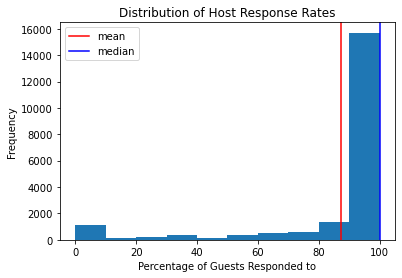

In [51]:
non_null_responses = df[df['host_response_rate'].isna()==False] # Getting rid of the null values
plt.figure()
plt.hist(non_null_responses['host_response_rate']) # Plotting the histogram
plt.axvline(non_null_responses['host_response_rate'].mean(), color='r', label='mean') # Display the mean

# Display the median
plt.axvline(non_null_responses['host_response_rate'].median(), color='b', label='median')

# Adding title and axis labels
plt.title('Distribution of Host Response Rates')
plt.ylabel('Frequency')
plt.xlabel('Percentage of Guests Responded to')
plt.legend()

plt.show()

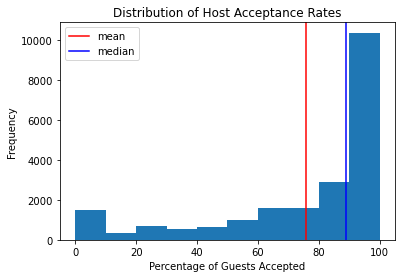

In [52]:
non_null_responses = df[df['host_acceptance_rate'].isna()==False] # Getting rid of the null values
plt.figure()
plt.hist(non_null_responses['host_acceptance_rate'])
plt.axvline(non_null_responses['host_acceptance_rate'].mean(), color='r', label='mean')
plt.axvline(non_null_responses['host_acceptance_rate'].median(), color='b', label='median')
plt.legend()
plt.title('Distribution of Host Acceptance Rates')
plt.ylabel('Frequency')
plt.xlabel('Percentage of Guests Accepted')

plt.show()

With the above information, we will drop `host_response_time` and impute both `host_response_rate` and `host_acceptance_rate` with the mean value

In [53]:
# dropping host_response_time
df.drop(columns ='host_response_time', inplace=True)

In [54]:
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())
df['host_response_rate'] = df['host_response_rate'] / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'] / 100

df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview              0.000000
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_response_rate                 0.000000
host_acceptance_rate               0.000000
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
neighbourhood_group_cleansed       0.000000
latitude                        

Now let's look at the `bedrooms` column:

In [55]:
missing_value_look(df, 'bedrooms').sample(30)

id                            listing_url last_scraped  \
19453  30387132  https://www.airbnb.com/rooms/30387132   2021-09-02   
3547    4480308   https://www.airbnb.com/rooms/4480308   2021-09-02   
31584  48104025  https://www.airbnb.com/rooms/48104025   2021-09-02   
35234  51060433  https://www.airbnb.com/rooms/51060433   2021-09-02   
34145  50265933  https://www.airbnb.com/rooms/50265933   2021-09-02   
10847  14963736  https://www.airbnb.com/rooms/14963736   2021-09-02   
35389  51172524  https://www.airbnb.com/rooms/51172524   2021-09-02   
30027  46416099  https://www.airbnb.com/rooms/46416099   2021-09-02   
30064  46463617  https://www.airbnb.com/rooms/46463617   2021-09-02   
3581    4518242   https://www.airbnb.com/rooms/4518242   2021-09-02   
19492  30389441  https://www.airbnb.com/rooms/30389441   2021-09-02   
36135  51599485  https://www.airbnb.com/rooms/51599485   2021-09-02   
33879  50070357  https://www.airbnb.com/rooms/50070357   2021-09-02   
10538  14312497  https://www.airbnb.com/rooms/14312497   2021-09-02   
13602  19871726  https://www.airbnb.com/rooms/19871726   2021-09-02   
32401  48867842  https://www.airbnb.com/rooms/48867842   2021-09-06   
3721    4668252   https://www.airbnb.com/rooms/4668252   2021-09-02   
1603    1483688   https://www.airbnb.com/rooms/1483688   2021-09-02   
36769  51924442  https://www.airbnb.com/rooms/51924442   2021-09-02   
9213   12558102  https://www.airbnb.com/rooms/12558102   2021-09-02   
20420  31980794  https://www.airbnb.com/rooms/31980794   2021-09-02   
29810  46195400  https://www.airbnb.com/rooms/46195400   2021-09-02   
12984  19001879  https://www.airbnb.com/rooms/19001879   2021-09-02   
31498  48027017  https://www.airbnb.com/rooms/48027017   2021-09-02   
10678  14628080  https://www.airbnb.com/rooms/14628080   2021-09-02   
3495    4421826   https://www.airbnb.com/rooms/4421826   2021-09-02   
20237  31549470  https://www.airbnb.com/rooms/31549470   2021-09-02   
13963  20420152  https://www.airbnb.com/rooms/20420152   2021-09-02   
31253  47813511  https://www.airbnb.com/rooms/47813511   2021-09-02   
2154    2255005   https://www.airbnb.com/rooms/2255005   2021-09-02   

                                                    name  \
19453  Rad Tribeca Studio, Indoor pool + Great views ...   
3547                     Charming, Sunny Downtown Studio   
31584    A+ Location Comfort Studio(Queen & Twin Bed) #3   
35234                 Comfy Private ROOM close to Vessel   
34145  Steps to Garment District üçé Walk to Pier 83 üçé ...   
10847                            Studio Near Time Square   
35389                          Short walk to Time Square   
30027                      Bright & Sunny Madison Studio   
30064               Park Avenue Cozy Studio! Murray Hill   
3581                              Zen MiniPalace Astoria   
19492  Shining Tribeca Studio w/ Indoor pool + Gym by...   
36135               UNTITLED at Freeman-Cozy Studio 1011   
33879    #404 Furnished studio in the heart of Manhattan   
10538                   Upper East Side Studio Apartment   
13602                    Prime Wburg, spacious and sunny   
32401                                      Vicky‚Äôs house   
3721                 Furnished studioB UES (30 days MIN)   
1603                      Peaceful Studio in Fort Greene   
36769           High ceilings / Open Loft @ Madison Ave.   
9213                    Studio Apt with Private Backyard   
20420         *Newly* Renovated Garden 2 Level Apartment   
29810                      Splendid NYC studio apartment   
12984            SUMMER'S END SPECIAL GREENPOINT GETAWAY   
31498             Hotel Room Queen/Queen Bright and Cozy   
10678              Elegant Studio in the Heart of Harlem   
3495                                    Manhattan Studio   
20237  Cozy UES Studio w/ Gym + Doorman near subway b...   
13963                 Charming Studio in Upper East Side   
31253                          Large King Bed Hotel Room   
215

We might be able to impute the bedrooms column with the `property_type` or the `room_type` columns. 

In [56]:
missing_value_look(df, 'bedrooms')['room_type'].value_counts()

Entire home/apt    3198
Private room        542
Hotel room           14
Name: room_type, dtype: int64

In [57]:
missing_value_look(df, 'bedrooms')['property_type'].value_counts()

Entire rental unit                     2714
Private room in rental unit             178
Room in hotel                           158
Entire condominium (condo)              107
Entire loft                             106
Room in boutique hotel                   97
Entire serviced apartment                63
Entire residential home                  57
Entire guest suite                       56
Private room in residential home         42
Room in aparthotel                       26
Entire townhouse                         24
Private room in guest suite              18
Entire place                             17
Private room in townhouse                16
Private room in resort                   11
Room in serviced apartment               11
Private room in condominium (condo)       9
Entire guesthouse                         8
Private room in loft                      7
Entire bungalow                           5
Camper/RV                                 4
Private room in serviced apartme

In [58]:
missing_value_look(df, 'beds')

id                            listing_url last_scraped  \
168       68253     https://www.airbnb.com/rooms/68253   2021-09-02   
650      468613    https://www.airbnb.com/rooms/468613   2021-09-02   
681      499249    https://www.airbnb.com/rooms/499249   2021-09-02   
693      505231    https://www.airbnb.com/rooms/505231   2021-09-02   
717      527237    https://www.airbnb.com/rooms/527237   2021-09-02   
...         ...                                    ...          ...   
36844  51957908  https://www.airbnb.com/rooms/51957908   2021-09-02   
36847  51958552  https://www.airbnb.com/rooms/51958552   2021-09-02   
36852  51960489  https://www.airbnb.com/rooms/51960489   2021-09-02   
36871  51964918  https://www.airbnb.com/rooms/51964918   2021-09-02   
36916  51999899  https://www.airbnb.com/rooms/51999899   2021-09-02   

                                                    name  \
168                         Room in the heart of Astoria   
650                  $1300 5/14 - 6/1 - 3 weeks - room f   
681                     WILLIAMSBURG FOR 25 DAYS, CHEAP!   
693                      Enjoy a 1 Bedroom to share, NYC   
717                    Gorgeous pvt room in West Village   
...                                                  ...   
36844  Private clean room & breakfast,10 min to Manha...   
36847    Perfect room for travelers Close to LGA&Midtown   
36852        Live + Work + Stay + Easy | 1BR in New York   
36871               20 mins train ride to NYC, free wifi   
36916  Sunny, Spacious Room with Laundry, Terrace, Ga...   

                                             description  \
168    <b>The space</b><br />This is a room in a 3 be...   
650    <b>The space</b><br />Great room in incredible...   
681    <b>The space</b><br />I'm going to be out of B...   
693    <b>The space</b><br />Rental female only. <br ...   
717    <b>The space</b><br />I'm subletting a private...   
...                                                  ...   
36844  Very quiet room in a 2 br brand new apartment....   
36847  The room is located in Astoria, Queens. The pl...   
36852  Stay for 30+ nights (minimum nights and rates ...   
36871  This brand new place is close to must-see dest...   
36916  Quiet, charming brownstone with tons of natura...   

                                   neighborhood_overview  \
168                                                 none   
650                                                 none   
681                                                 none   
693                                                 none   
717                                                 none   
...                                                  ...   
36844                                               none   
36847                                               none   
36852                                               none   
36871                                               none   
36916  There are a ton of great cafes, restaurants, a...   

                                             picture_url    host_id  \
168    https://a0.muscache.com/pictures/61b296eb-2adc...      67730   
650    https://a0.muscache.com/pictures/5514600/8f890...    2325861   
681    https://a0.muscache.com/pictures/5959676/1ec0f...    2463894   
693    https://a0.muscache.com/pictures/6044146/40469...    2490915   
717    https://a0.muscache.com/pictures/6358887/83255...    2591015   
...                                                  ...        ...   
36844  https://a0.muscache.com/pictures/f09dbd0a-5362...    1746238   
36847  https://a0.muscache.com/pictures/152b85a2-5956...  330073240   
36852  https://a0.muscache.com/pictures/a4re/floorpla...  359229620   
36871  https://a0.muscache.com/pictures/15b0d026-9433...  420445980   
36916  https://a0.muscache.com/pictures/411c1e1b-febd...     647100   

                                          host_url  host_name  host_since  \
168        https://www.airbnb.com/users/show/67730      Boris  2010

Here we will impute the `NaN` values in `bedrooms` with the values from `beds`

In [59]:
df.isna().sum()

id                                   0
listing_url                          0
last_scraped                         0
name                                 0
description                          0
neighborhood_overview                0
picture_url                          0
host_id                              0
host_url                             0
host_name                            0
host_since                           0
host_location                        0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_total_listings_count            0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                

In [60]:
df['bedrooms'] = df.groupby('beds')['bedrooms'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [61]:
df.isna().sum()

id                                   0
listing_url                          0
last_scraped                         0
name                                 0
description                          0
neighborhood_overview                0
picture_url                          0
host_id                              0
host_url                             0
host_name                            0
host_since                           0
host_location                        0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_total_listings_count            0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                

And now we can drop the rows in `bedrooms` and `beds` that are missing values.

In [62]:
df = df.dropna(subset='beds')
df.isna().sum()

id                                   0
listing_url                          0
last_scraped                         0
name                                 0
description                          0
neighborhood_overview                0
picture_url                          0
host_id                              0
host_url                             0
host_name                            0
host_since                           0
host_location                        0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_total_listings_count            0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                

In [63]:
missing_value_look(df, 'first_review').sample(3)

id                            listing_url last_scraped  \
34719  50700132  https://www.airbnb.com/rooms/50700132   2021-09-02   
36264  51670813  https://www.airbnb.com/rooms/51670813   2021-09-02   
33837  50047754  https://www.airbnb.com/rooms/50047754   2021-09-02   

                                                    name  \
34719  Private Queen Charm at a Fifth Ave Boutique Hotel   
36264                     Lovely Room | PRIVATE BATHROOM   
33837                     #52DP Furnished Studio Rentals   

                                             description  \
34719  ‚ÄãA quiet, tucked away oasis near Rockefeller C...   
36264  Apartment in the Heart of Manhattan. 10 Minute...   
33837  Extended Stay Hotel , private room with privat...   

                                   neighborhood_overview  \
34719  MANHATTAN<br />EXPLORE THE ICONIC SITES OF "TH...   
36264  Walk out of the Hell's Kitchen House and you‚Äôl...   
33837                                               none   

                                             picture_url    host_id  \
34719  https://a0.muscache.com/pictures/330a3f94-2996...  394817730   
36264  https://a0.muscache.com/pictures/0235b8ba-61cf...  394144623   
33837  https://a0.muscache.com/pictures/8e5d81a1-3d68...  395671107   

                                          host_url     host_name  host_since  \
34719  https://www.airbnb.com/users/show/394817730         Blake  2021-03-30   
36264  https://www.airbnb.com/users/show/394144623      Kristina  2021-03-25   
33837  https://www.airbnb.com/users/show/395671107  Esplanade 99  2021-04-05   

                           host_location  host_response_rate  \
34719  New York, New York, United States                0.97   
36264                                 US                0.92   
33837                                 US                1.00   

       host_acceptance_rate  host_is_superhost host_neighbourhood  \
34719              1.000000                0.0            Midtown   
36264              0.758428                0.0     Hell's Kitchen   
33837              0.910000                0.0    Upper West Side   

       host_total_listings_count  host_verifications  host_has_profile_pic  \
34719                       59.0  ['email', 'phone']                   1.0   
36264                        0.0           ['phone']                   1.0   
33837                       24.0  ['email', 'phone']                   1.0   

       host_identity_verified neighbourhood_cleansed  \
34719                     1.0                Midtown   
36264                     1.0         Hell's Kitchen   
33837                     1.0        Upper West Side   

      neighbourhood_group_cleansed  latitude  longitude  \
34719                    Manhattan  40.76322 -73.977290   
36264                    Manhattan  40.76308 -73.992707   
33837                    Manhattan  40.79753 -73.969910   

                     property_type     room_type  accommodates  num_bathrooms  \
34719       Room in boutique hotel  Private room             2            1.0   
36264  Private room in rental unit  Private room             2            1.0   
33837                Room in hotel  Private room             2            1.0   

       bedrooms  beds                                          amenities  \
34719       1.0   1.0  ["Dedicated workspace", "Essentials", "Private...   
36264       1.0   1.0  ["Kitchen", "Washer", "Smoke alarm", "Heating"...   
33837       1.0   2.0  ["Dedicated workspace", "Private entrance", "I...   

         price  minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
34719  $154.00               1              27                     1.0   
36264   $83.00              30             367                    30.0   
33837   $74.00              30              90                    30.0   

       maximum_nights_avg_ntm  has_availability  availability_30  \
34719                  1125.0                 1               21   
36264                  

These missing review dates indicate that at the time of scraping this web data, these hosts had no reviews. One of our main business questions is what determines whether a host gets a good review or not. Unfortunately, we will need to remove these rows that have no reviews.

In [64]:
df = df.dropna(subset = ['first_review', 'last_review'])
df.isna().sum()

id                                  0
listing_url                         0
last_scraped                        0
name                                0
description                         0
neighborhood_overview               0
picture_url                         0
host_id                             0
host_url                            0
host_name                           0
host_since                          0
host_location                       0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_neighbourhood                  0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates

In [65]:
df.shape

(26782, 58)

In [66]:
missing_value_look(df, 'review_scores_value').sample(3)

id                            listing_url last_scraped  \
13946  20394608  https://www.airbnb.com/rooms/20394608   2021-09-02   
7932   10083881  https://www.airbnb.com/rooms/10083881   2021-09-02   
13366  19544404  https://www.airbnb.com/rooms/19544404   2021-09-02   

                                                 name  \
13946  Hamilton Heights sun filled spacious master BR   
7932              Well Equipped One-Bedroom Apartment   
13366             Beautiful 2 Bedroom Lower East Side   

                                             description  \
13946  Top floor (walk-up) apartment with plenty of s...   
7932   Fully furnished apartment, one block from Morn...   
13366  Beautiful, very lit apartment in the heart of ...   

                                   neighborhood_overview  \
13946  Great location super close to midtown (25min) ...   
7932                                                none   
13366                                               none   

                                             picture_url   host_id  \
13946  https://a0.muscache.com/pictures/571c91ad-ecfd...  75749777   
7932   https://a0.muscache.com/pictures/137a4363-7a29...  51743699   
13366  https://a0.muscache.com/pictures/b5ff597b-24a5...  72539408   

                                         host_url host_name  host_since  \
13946  https://www.airbnb.com/users/show/75749777    Mykola  2016-06-04   
7932   https://www.airbnb.com/users/show/51743699    Oliver  2015-12-19   
13366  https://www.airbnb.com/users/show/72539408  Michelle  2016-05-17   

                              host_location  host_response_rate  \
13946     New York, New York, United States            0.872499   
7932      New York, New York, United States            0.872499   
13366  Weehawken, New Jersey, United States            0.872499   

       host_acceptance_rate  host_is_superhost   host_neighbourhood  \
13946              0.758428                0.0     Hamilton Heights   
7932               0.758428                0.0  Morningside Heights   
13366              0.758428                0.0      Lower East Side   

       host_total_listings_count  \
13946                        1.0   
7932                         1.0   
13366                        1.0   

                                      host_verifications  \
13946  ['email', 'phone', 'facebook', 'reviews', 'jum...   
7932   ['email', 'phone', 'offline_government_id', 's...   
13366                                 ['email', 'phone']   

       host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
13946                   1.0                     1.0                 Harlem   
7932                    1.0                     1.0    Morningside Heights   
13366                   1.0                     1.0        Lower East Side   

      neighbourhood_group_cleansed  latitude  longitude  \
13946                    Manhattan  40.82038  -73.95309   
7932                     Manhattan  40.80866  -73.95997   
13366                    Manhattan  40.72104  -73.98762   

                     property_type        room_type  accommodates  \
13946  Private room in rental unit     Private room             2   
7932            Entire rental unit  Entire home/apt             2   
13366           Entire rental unit  Entire home/apt             2   

       num_bathrooms  bedrooms  beds  \
13946            1.0       1.0   1.0   
7932             1.0       1.0   1.0   
13366            1.0       2.0   1.0   

                                               amenities    price  \
13946  ["Kitchen", "Washer", "Smoke alarm", "Heating"...   $49.00   
7932   ["Kitchen", "Washer", "Smoke alarm", "Heating"...  $100.00   
13366  ["Hangers", "TV", "Shampoo", "Air conditioning...  $100.00   

       minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
13946              30              30                    30.0   
7932               30            1125                    30.0   
13366              30            11

For the rest of the columns with null values, we will drop these listings as well. These columns also could influence our target column which is `review_scores_rating`. They will be removed in the preprocessing step however.

In [67]:
df = df.dropna(subset = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 
                        'review_scores_location', 'review_scores_value'])
df.isna().sum()

id                                0
listing_url                       0
last_scraped                      0
name                              0
description                       0
neighborhood_overview             0
picture_url                       0
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
num_bathrooms               

The below cell is a checkpoint that raises an error if nulls still exist in the dataset.

In [68]:
if df.isna().sum().sum() != 0:
    raise Exception('Oops! There are still some nulls in your data') # Raises an error if the condition is satisfied


In [69]:
df.shape

(26175, 58)

Woohoo! We have rid our dataset of all null values. Now onto the data formatting. Let's look at the datatypes for each column again.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26175 entries, 0 to 36854
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              26175 non-null  int64         
 1   listing_url                     26175 non-null  object        
 2   last_scraped                    26175 non-null  datetime64[ns]
 3   name                            26175 non-null  object        
 4   description                     26175 non-null  object        
 5   neighborhood_overview           26175 non-null  object        
 6   picture_url                     26175 non-null  object        
 7   host_id                         26175 non-null  int64         
 8   host_url                        26175 non-null  object        
 9   host_name                       26175 non-null  object        
 10  host_since                      26175 non-null  object        
 11  ho

A couple things stand out:


- `host_since` should be a datetime 
- `neighbourhood_group_cleansed` could have its name changed to something like `borough`
- `price` should be either an `int` or a `float` type
- We can remove `minimum_nights_average_ntm` and `maximum_nights_average_ntm`

After these tasks are completed, we should be able to move to EDA.

In [71]:
df['host_since'] = pd.to_datetime(df['host_since']) # Converting to a datetime type
df.rename({'neighbourhood_group_cleansed': 'borough', 'neighbourhood_cleansed': 'neighborhood', 
          'neighborhood_overview': 'neighborhood_description', 
           'calculated_host_listing_count': 'host_total_listings'}, inplace=True, axis=1) # renaming columns

# Getting rid of extra characters in the price column and converting to a numeric type
df['price'] = df['price'].str.replace('$', '') 
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)


/var/folders/fy/9mbkzf_90pxdhyqvqzzqf5h40000gn/T/ipykernel_34106/3990534919.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


We can also drop the columns `minimum_nights_avg_ntm` and `maximum_nights_avg_ntm` as they are redundant information.

In [72]:
df.drop(columns=['minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26175 entries, 0 to 36854
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              26175 non-null  int64         
 1   listing_url                     26175 non-null  object        
 2   last_scraped                    26175 non-null  datetime64[ns]
 3   name                            26175 non-null  object        
 4   description                     26175 non-null  object        
 5   neighborhood_description        26175 non-null  object        
 6   picture_url                     26175 non-null  object        
 7   host_id                         26175 non-null  int64         
 8   host_url                        26175 non-null  object        
 9   host_name                       26175 non-null  object        
 10  host_since                      26175 non-null  datetime64[ns]
 11  ho

In [86]:
df.isna().sum()

id                                0
listing_url                       0
last_scraped                      0
name                              0
description                       0
neighborhood_description          0
picture_url                       0
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighborhood                      0
borough                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
num_bathrooms               

Now all of our data is fully cleaned. Next we will export this to a `.csv` file that will then be used for data preprocessing for our machine learning models.

In [85]:
df.to_csv('clean_data/clean_sept2021_data.csv') # Exports data to a clean_data folder